In [1]:
import pandas as pd

In [6]:
data = pd.read_csv(r"C:\Users\khali\OneDrive\Documents\Case Study Data.csv")

In [8]:
# Show basic info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120871 entries, 0 to 120870
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Index               120871 non-null  int64  
 1   Order No            120871 non-null  object 
 2   Customer ID         120871 non-null  object 
 3   Site                120871 non-null  object 
 4   Channel (Web)       120871 non-null  object 
 5   Base Currency Code  120871 non-null  object 
 6   Base Revenue        120871 non-null  float64
 7   FX Rate             120871 non-null  float64
 8   Reporting Revenue   120871 non-null  object 
 9   Invoiced Date       120871 non-null  object 
 10  Delivery Country    120871 non-null  object 
 11  Product Range       120871 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 11.1+ MB
None


In [12]:
print(data.head())

   Index               Order No       Customer ID  Site Channel (Web)  \
0      1  ORDACODR4122316575695  CUS5020005842526  MANC       Non-Web   
1      2  ORDEKOE10157604022214  CUS9720048726428  MILA       Non-Web   
2      3  ORDLQME10161113943828  CUS5220014554169  MILA           Web   
3      4  ORDMNZE10162377382941  CUS9720048726428  MILA           Web   
4      5  ORDOTBE10163125040476  CUS6320133703341  MANC           Web   

  Base Currency Code  Base Revenue  FX Rate Reporting Revenue Invoiced Date  \
0                USD         52.42     1.27            41.28       6/8/2023   
1                EUR        267.30     1.19           224.62      10/2/2023   
2                EUR        351.48     1.19           295.36      11/1/2023   
3                EUR        705.13     1.19           592.55      10/2/2023   
4                USD        471.88     1.34           352.15       1/4/2023   

  Delivery Country   Product Range  
0    UNITED STATES  Industrials OP  
1           

In [14]:
# Check the unique delivery countries to understand where the formats might differ
print(data['Delivery Country'].unique())

# Inspect the first few dates in 'Invoiced Date' column to see the format inconsistencies
print(data['Invoiced Date'].head())

# Use pd.to_datetime to convert dates, handling various date formats
data['Invoiced Date'] = pd.to_datetime(data['Invoiced Date'], errors='coerce', dayfirst=True)

# Check if there are any invalid dates (NaT - Not a Time)
invalid_dates = data[data['Invoiced Date'].isna()]
print(f"Invalid Dates: {invalid_dates}")

# Show the first few rows after conversion to ensure the dates are standardized
print(data.head())

['UNITED STATES' 'ITALY' 'IT' 'USA' 'PORTUGAL' 'CANADA' 'SPAIN' 'ES'
 'NETHERLANDS' 'FINLAND' 'LITHUANIA' 'FR' 'GERMANY' 'MEXICO' 'POLAND'
 'NORWAY' 'SWEDEN' 'TURKEY' 'CZECH REPUBLIC' 'SWITZERLAND' 'FRANCE'
 'BOSNIA AND HERZEGOVINA' 'ICELAND' 'DENMARK' 'UNITED KINGDOM' 'BELGIUM'
 'ROMANIA' 'UK' 'IRELAND' 'HUNGARY' 'GREECE' 'SERBIA' 'CROATIA' 'SLOVENIA'
 'AUSTRIA' 'SLOVAKIA' 'LATVIA' 'ALBANIA' 'MALTA' 'ESTONIA' 'LUXEMBOURG'
 'BULGARIA']
0     6/8/2023
1    10/2/2023
2    11/1/2023
3    10/2/2023
4     1/4/2023
Name: Invoiced Date, dtype: object
Invalid Dates:          Index               Order No       Customer ID  Site Channel (Web)  \
7            8  ORDWKYE10165592190028  CUS5520114795757  MANC           Web   
10          11  ORDDVLE10167371855338  CUS5620091280401  MANC           Web   
12          13  ORDOHAE10167493438123  CUS3620042392619  MANC           Web   
18          19  ORDGHTE10167822070390  CUS0720136496321  MANC           Web   
20          21  ORDNSRE10168250044410  C

In [16]:
invalid_dates = data[data['Invoiced Date'].isna()]
print(invalid_dates)

         Index               Order No       Customer ID  Site Channel (Web)  \
7            8  ORDWKYE10165592190028  CUS5520114795757  MANC           Web   
10          11  ORDDVLE10167371855338  CUS5620091280401  MANC           Web   
12          13  ORDOHAE10167493438123  CUS3620042392619  MANC           Web   
18          19  ORDGHTE10167822070390  CUS0720136496321  MANC           Web   
20          21  ORDNSRE10168250044410  CUS7120046703188  MANC           Web   
...        ...                    ...               ...   ...           ...   
120866  120867  ORDZNXY10165713564560  CUS8120040045503  MANC       Non-Web   
120867  120868  ORDFXTY10165713721565  CUS8120040045503  MANC       Non-Web   
120868  120869  ORDPEHY10165714901484  CUS9420041939153  MANC       Non-Web   
120869  120870  ORDEDFY10165717333149  CUS5020005842526  MANC       Non-Web   
120870  120871  ORDNKRY10165717782398  CUS5020005842526  MANC       Non-Web   

       Base Currency Code  Base Revenue  FX Rate Re

In [18]:
# Check for missing values in 'Invoiced Date' column
missing_dates_count = data['Invoiced Date'].isna().sum()
print(f"Total missing dates: {missing_dates_count}")

Total missing dates: 37174


In [20]:
# Group by Customer ID and forward fill the missing 'Invoiced Date' values
data['Invoiced Date'] = data.groupby('Customer ID')['Invoiced Date'].fillna(method='ffill')

# Verify how many missing dates remain after forward filling
missing_dates_count_after_filling = data['Invoiced Date'].isna().sum()
print(f"Total missing dates after filling: {missing_dates_count_after_filling}")

C:\Users\khali\AppData\Local\Temp\ipykernel_23888\763304832.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  data['Invoiced Date'] = data.groupby('Customer ID')['Invoiced Date'].fillna(method='ffill')
C:\Users\khali\AppData\Local\Temp\ipykernel_23888\763304832.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Invoiced Date'] = data.groupby('Customer ID')['Invoiced Date'].fillna(method='ffill')


Total missing dates after filling: 5874


In [22]:
# Check rows with missing 'Invoiced Date' after filling
invalid_dates_after_filling = data[data['Invoiced Date'].isna()]
print(f"Rows with missing dates after forward-filling:\n{invalid_dates_after_filling[['Customer ID', 'Invoiced Date']]}")

Rows with missing dates after forward-filling:
             Customer ID Invoiced Date
7       CUS5520114795757           NaT
10      CUS5620091280401           NaT
12      CUS3620042392619           NaT
18      CUS0720136496321           NaT
20      CUS7120046703188           NaT
...                  ...           ...
120807  CUS3620041686222           NaT
120808  CUS3620041686222           NaT
120826  CUS7120152563041           NaT
120827  CUS7120152563041           NaT
120839  CUS0320029459270           NaT

[5874 rows x 2 columns]


In [24]:
# Drop rows with still missing 'Invoiced Date'
data_cleaned = data.dropna(subset=['Invoiced Date'])

# Check how many rows were dropped
removed_rows = len(data) - len(data_cleaned)
print(f"Rows with missing dates dropped: {removed_rows}")

Rows with missing dates dropped: 5874


In [26]:
print(data_cleaned.head())

   Index               Order No       Customer ID  Site Channel (Web)  \
0      1  ORDACODR4122316575695  CUS5020005842526  MANC       Non-Web   
1      2  ORDEKOE10157604022214  CUS9720048726428  MILA       Non-Web   
2      3  ORDLQME10161113943828  CUS5220014554169  MILA           Web   
3      4  ORDMNZE10162377382941  CUS9720048726428  MILA           Web   
4      5  ORDOTBE10163125040476  CUS6320133703341  MANC           Web   

  Base Currency Code  Base Revenue  FX Rate Reporting Revenue Invoiced Date  \
0                USD         52.42     1.27            41.28     2023-08-06   
1                EUR        267.30     1.19           224.62     2023-02-10   
2                EUR        351.48     1.19           295.36     2023-01-11   
3                EUR        705.13     1.19           592.55     2023-02-10   
4                USD        471.88     1.34           352.15     2023-04-01   

  Delivery Country   Product Range  
0    UNITED STATES  Industrials OP  
1           

In [36]:
# Update the country mapping to handle all variations
country_mapping = {
    'UK': 'United Kingdom',
    'UNITED KINGDOM': 'United Kingdom',
    'IT': 'Italy',
    'ITALY': 'Italy',
    'ES': 'Spain',
    'SPAIN': 'Spain',
    'DE': 'Germany',
    'GERMANY': 'Germany',
    'FR': 'France',
    'FRANCE': 'France',
    'USA': 'United States',
    'UNITED STATES': 'United States',
    'ESTONIA': 'Estonia',
    'EE': 'Estonia',
    'PORTUGAL': 'Portugal',
    'BELGIUM': 'Belgium',
    'CANADA': 'Canada',
    'TURKEY': 'Turkey'
}

# Apply the country mapping
data_cleaned.loc[:, 'Delivery Country'] = data_cleaned['Delivery Country'].replace(country_mapping)

# Verify the unique countries
print(data_cleaned['Delivery Country'].unique())

['United States' 'Italy' 'Portugal' 'Canada' 'Spain' 'NETHERLANDS'
 'FINLAND' 'LITHUANIA' 'France' 'Germany' 'MEXICO' 'POLAND' 'NORWAY'
 'SWEDEN' 'Turkey' 'CZECH REPUBLIC' 'SWITZERLAND' 'BOSNIA AND HERZEGOVINA'
 'ICELAND' 'DENMARK' 'United Kingdom' 'Belgium' 'ROMANIA' 'IRELAND'
 'HUNGARY' 'GREECE' 'SERBIA' 'CROATIA' 'SLOVENIA' 'AUSTRIA' 'SLOVAKIA'
 'LATVIA' 'ALBANIA' 'MALTA' 'Estonia' 'LUXEMBOURG' 'BULGARIA']


In [40]:
# Standardize capitalization (convert to Title Case for all words) using .loc
data_cleaned.loc[:, 'Delivery Country'] = data_cleaned['Delivery Country'].str.title()

# Verify the unique countries again after title case standardization
print(data_cleaned['Delivery Country'].unique())

['United States' 'Italy' 'Portugal' 'Canada' 'Spain' 'Netherlands'
 'Finland' 'Lithuania' 'France' 'Germany' 'Mexico' 'Poland' 'Norway'
 'Sweden' 'Turkey' 'Czech Republic' 'Switzerland' 'Bosnia And Herzegovina'
 'Iceland' 'Denmark' 'United Kingdom' 'Belgium' 'Romania' 'Ireland'
 'Hungary' 'Greece' 'Serbia' 'Croatia' 'Slovenia' 'Austria' 'Slovakia'
 'Latvia' 'Albania' 'Malta' 'Estonia' 'Luxembourg' 'Bulgaria']


In [44]:
# Standardize capitalization (convert to Title Case for all words)
data_cleaned.loc[:, 'Product Range'] = data_cleaned['Product Range'].str.title()

# Remove any leading or trailing spaces from the 'Product Range' column
data_cleaned.loc[:, 'Product Range'] = data_cleaned['Product Range'].str.strip()

# Verify the changes
print(data_cleaned['Product Range'].unique())

['Industrials Op' 'Trc' 'Dr E Op' 'Mikromolop' 'Mikromol Op' 'Dreop'
 'Industrialsop' 'Logical Op' 'Logicalop' 'Lipomedop' 'Lipomed Op']


In [46]:
# Define a dictionary to standardize product names
product_mapping = {
    'Mikromolop': 'Mikromol OP',
    'Mikromol': 'Mikromol OP',
    'Dreop': 'Dr E OP',
    'Industrialsop': 'Industrials OP',
    'Logicalolop': 'Logical OP',
    'Lipomedop': 'Lipomed OP',
    'Trc': 'Trc',           
    'Dr E': 'Dr E OP'
}

# Apply the mapping to the 'Product Range' column using .loc[]
data_cleaned.loc[:, 'Product Range'] = data_cleaned['Product Range'].replace(product_mapping)

# Verify the changes
print(data_cleaned['Product Range'].unique())

['Industrials Op' 'Trc' 'Dr E Op' 'Mikromol OP' 'Mikromol Op' 'Dr E OP'
 'Industrials OP' 'Logical Op' 'Logicalop' 'Lipomed OP' 'Lipomed Op']


In [50]:
# Define a dictionary to standardize product names
product_mapping = {
    'Mikromol Op': 'Mikromol OP',
    'Dr E Op' : 'Dr E OP',
    'Industrials Op': 'Industrials OP',
    'Industrials OP': 'Industrials OP',
    'Logical Op': 'Logical OP',
    'Logicalop': 'Logical OP',
    'Lipomed Op': 'Lipomed OP'
}

# Apply the mapping to the 'Product Range' column using .loc[]
data_cleaned.loc[:, 'Product Range'] = data_cleaned['Product Range'].replace(product_mapping)

# Verify the changes
print(data_cleaned['Product Range'].unique())

['Industrials OP' 'Trc' 'Dr E OP' 'Mikromol OP' 'Logical OP' 'Lipomed OP']


In [52]:
# Check for missing values in the entire data
print(data_cleaned.isna().sum())

Index                 0
Order No              0
Customer ID           0
Site                  0
Channel (Web)         0
Base Currency Code    0
Base Revenue          0
FX Rate               0
Reporting Revenue     0
Invoiced Date         0
Delivery Country      0
Product Range         0
dtype: int64


In [56]:
print(data_cleaned['Product Range'].unique())  # Check unique product names
print(data_cleaned['Delivery Country'].unique())  # Check unique countries

['Industrials OP' 'Trc' 'Dr E OP' 'Mikromol OP' 'Logical OP' 'Lipomed OP']
['United States' 'Italy' 'Portugal' 'Canada' 'Spain' 'Netherlands'
 'Finland' 'Lithuania' 'France' 'Germany' 'Mexico' 'Poland' 'Norway'
 'Sweden' 'Turkey' 'Czech Republic' 'Switzerland' 'Bosnia And Herzegovina'
 'Iceland' 'Denmark' 'United Kingdom' 'Belgium' 'Romania' 'Ireland'
 'Hungary' 'Greece' 'Serbia' 'Croatia' 'Slovenia' 'Austria' 'Slovakia'
 'Latvia' 'Albania' 'Malta' 'Estonia' 'Luxembourg' 'Bulgaria']


In [58]:
# Check for duplicate rows
print(data_cleaned.duplicated().sum())

0


In [60]:
# Get summary statistics for numeric columns
print(data_cleaned.describe())

               Index   Base Revenue        FX Rate  \
count  114997.000000  114997.000000  114997.000000   
mean    60877.414402     528.579944       1.368883   
min         1.000000       1.220000       1.130000   
25%     30871.000000      72.130000       1.190000   
50%     61370.000000     175.760000       1.270000   
75%     90491.000000     383.170000       1.680000   
max    120871.000000  199107.070000       1.680000   
std     34670.655020    2035.403387       0.221771   

                       Invoiced Date  
count                         114997  
mean   2023-08-21 05:33:33.767315712  
min              2023-01-02 00:00:00  
25%              2023-04-14 00:00:00  
50%              2023-08-08 00:00:00  
75%              2023-11-27 00:00:00  
max              2024-12-03 00:00:00  
std                              NaN  


In [62]:
print(data_cleaned.head())

   Index               Order No       Customer ID  Site Channel (Web)  \
0      1  ORDACODR4122316575695  CUS5020005842526  MANC       Non-Web   
1      2  ORDEKOE10157604022214  CUS9720048726428  MILA       Non-Web   
2      3  ORDLQME10161113943828  CUS5220014554169  MILA           Web   
3      4  ORDMNZE10162377382941  CUS9720048726428  MILA           Web   
4      5  ORDOTBE10163125040476  CUS6320133703341  MANC           Web   

  Base Currency Code  Base Revenue  FX Rate Reporting Revenue Invoiced Date  \
0                USD         52.42     1.27            41.28     2023-08-06   
1                EUR        267.30     1.19           224.62     2023-02-10   
2                EUR        351.48     1.19           295.36     2023-01-11   
3                EUR        705.13     1.19           592.55     2023-02-10   
4                USD        471.88     1.34           352.15     2023-04-01   

  Delivery Country   Product Range  
0    United States  Industrials OP  
1           

In [64]:
# Save the cleaned dataset
data_cleaned.to_csv('cleaned_data_LGC.csv', index=False)

In [102]:
data_cleaned = pd.read_csv(r"C:\Users\khali\cleaned_data_LGC.csv")

In [104]:
print(data_cleaned.head())

   Index               Order No       Customer ID  Site Channel (Web)  \
0      1  ORDACODR4122316575695  CUS5020005842526  MANC       Non-Web   
1      2  ORDEKOE10157604022214  CUS9720048726428  MILA       Non-Web   
2      3  ORDLQME10161113943828  CUS5220014554169  MILA           Web   
3      4  ORDMNZE10162377382941  CUS9720048726428  MILA           Web   
4      5  ORDOTBE10163125040476  CUS6320133703341  MANC           Web   

  Base Currency Code  Base Revenue  FX Rate Reporting Revenue Invoiced Date  \
0                USD         52.42     1.27            41.28     2023-08-06   
1                EUR        267.30     1.19           224.62     2023-02-10   
2                EUR        351.48     1.19           295.36     2023-01-11   
3                EUR        705.13     1.19           592.55     2023-02-10   
4                USD        471.88     1.34           352.15     2023-04-01   

  Delivery Country   Product Range  
0    United States  Industrials OP  
1           

In [106]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114997 entries, 0 to 114996
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Index               114997 non-null  int64  
 1   Order No            114997 non-null  object 
 2   Customer ID         114997 non-null  object 
 3   Site                114997 non-null  object 
 4   Channel (Web)       114997 non-null  object 
 5   Base Currency Code  114997 non-null  object 
 6   Base Revenue        114997 non-null  float64
 7   FX Rate             114997 non-null  float64
 8   Reporting Revenue   114997 non-null  object 
 9   Invoiced Date       114997 non-null  object 
 10  Delivery Country    114997 non-null  object 
 11  Product Range       114997 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 10.5+ MB


In [110]:
# Step 1: Clean the 'Reporting Revenue' column by removing commas and converting to numeric
data_cleaned['Reporting Revenue'] = data_cleaned['Reporting Revenue'].replace({',': ''}, regex=True)  # Remove commas

# Convert 'Reporting Revenue' to numeric (float64), coerce errors to NaN
data_cleaned['Reporting Revenue'] = pd.to_numeric(data_cleaned['Reporting Revenue'], errors='coerce')

In [112]:
print(data_cleaned.isna().sum())

Index                 0
Order No              0
Customer ID           0
Site                  0
Channel (Web)         0
Base Currency Code    0
Base Revenue          0
FX Rate               0
Reporting Revenue     0
Invoiced Date         0
Delivery Country      0
Product Range         0
dtype: int64


In [116]:
# Filter the dataset for the specific customer and check for missing 'Reporting Revenue' values
customer_data = data_cleaned[data_cleaned['Customer ID'] == 'CUS0020094734849']

# Check how many missing values there are in 'Reporting Revenue' for this customer
missing_customer_revenue = customer_data['Reporting Revenue'].isna().sum()
print(f"Missing 'Reporting Revenue' for customer CUS0020094734849: {missing_customer_revenue}")

print(customer_data.head())

Missing 'Reporting Revenue' for customer CUS0020094734849: 0
       Index               Order No       Customer ID  Site Channel (Web)  \
84351  88423  ORDOCNY10150176077021  CUS0020094734849  MANC       Non-Web   
84352  88424  ORDMDDY10150176779710  CUS0020094734849  MANC       Non-Web   
84466  88549  ORDSMVY10150265137266  CUS0020094734849  MANC       Non-Web   
84467  88550  ORDWQYY10150265367770  CUS0020094734849  MANC       Non-Web   
86339  90584  ORDSNBY10151143620956  CUS0020094734849  MANC       Non-Web   

      Base Currency Code  Base Revenue  FX Rate  Reporting Revenue  \
84351                USD        151.62     1.34             113.15   
84352                USD        270.61     1.34             201.95   
84466                USD        600.80     1.34             448.36   
84467                USD        206.08     1.34             153.79   
86339                USD        124.49     1.34              92.90   

      Invoiced Date Delivery Country Product Range  
84

In [122]:
# 'Invoiced Date' to datetime format
data_cleaned['Invoiced Date'] = pd.to_datetime(data_cleaned['Invoiced Date'], errors='coerce')

In [124]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114997 entries, 0 to 114996
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Index               114997 non-null  int64         
 1   Order No            114997 non-null  object        
 2   Customer ID         114997 non-null  object        
 3   Site                114997 non-null  object        
 4   Channel (Web)       114997 non-null  object        
 5   Base Currency Code  114997 non-null  object        
 6   Base Revenue        114997 non-null  float64       
 7   FX Rate             114997 non-null  float64       
 8   Reporting Revenue   114997 non-null  float64       
 9   Invoiced Date       114997 non-null  datetime64[ns]
 10  Delivery Country    114997 non-null  object        
 11  Product Range       114997 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 10.5+ MB


In [126]:
# Filter for Mar23 and Apr23 data
mar_apr_data = data_cleaned[(data_cleaned['Invoiced Date'].dt.month == 3) & (data_cleaned['Invoiced Date'].dt.year == 2023) |
                            (data_cleaned['Invoiced Date'].dt.month == 4) & (data_cleaned['Invoiced Date'].dt.year == 2023)]

# Filter for the specific customer
customer_mar_apr = mar_apr_data[mar_apr_data['Customer ID'] == 'CUS0020094734849']

# Calculate the total Reporting Revenue for Mar23 & Apr23
total_reporting_revenue = customer_mar_apr['Reporting Revenue'].sum()

# Print the total reporting revenue
print(f"Total Reporting Revenue for Mar23 & Apr23 for CUS0020094734849: ${total_reporting_revenue:.2f}")

Total Reporting Revenue for Mar23 & Apr23 for CUS0020094734849: $2489.90


In [128]:
# Filter data for December 2023
december_data = data_cleaned[(data_cleaned['Invoiced Date'].dt.month == 12) & (data_cleaned['Invoiced Date'].dt.year == 2023)]

# Summarise the total revenue for December 2023
total_december_revenue = december_data['Reporting Revenue'].sum()
print(f"Total Revenue for December 2023: ${total_december_revenue:.2f}")

# Compare with revenue in other months (e.g., Nov 2023, Jan 2024) for context
november_data = data_cleaned[(data_cleaned['Invoiced Date'].dt.month == 11) & (data_cleaned['Invoiced Date'].dt.year == 2023)]
total_november_revenue = november_data['Reporting Revenue'].sum()
print(f"Total Revenue for November 2023: ${total_november_revenue:.2f}")

january_data = data_cleaned[(data_cleaned['Invoiced Date'].dt.month == 1) & (data_cleaned['Invoiced Date'].dt.year == 2024)]
total_january_revenue = january_data['Reporting Revenue'].sum()
print(f"Total Revenue for January 2024: ${total_january_revenue:.2f}")

Total Revenue for December 2023: $2331364.16
Total Revenue for November 2023: $3400971.83
Total Revenue for January 2024: $1667094.34


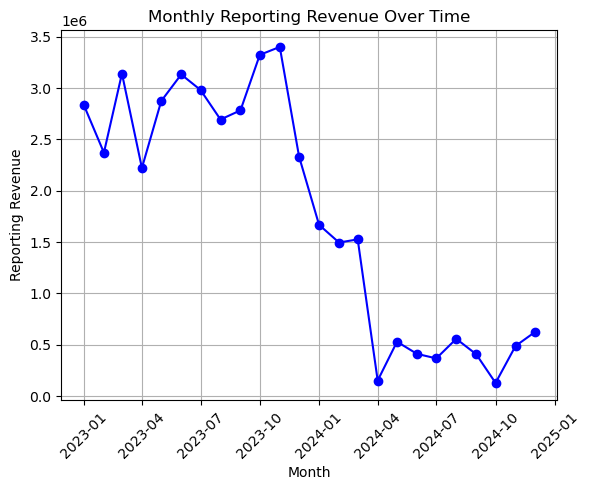

In [134]:
import matplotlib.pyplot as plt

# Convert the PeriodIndex to DatetimeIndex
monthly_revenue = data_cleaned.groupby(data_cleaned['Invoiced Date'].dt.to_period('M'))['Reporting Revenue'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()  # Convert PeriodIndex to DatetimeIndex

# Plot the 'Reporting Revenue' over time
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Reporting Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Reporting Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\khali\AppData\Local\Temp\ipykernel_23888\2341963152.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = revenue_data.resample('M').sum()


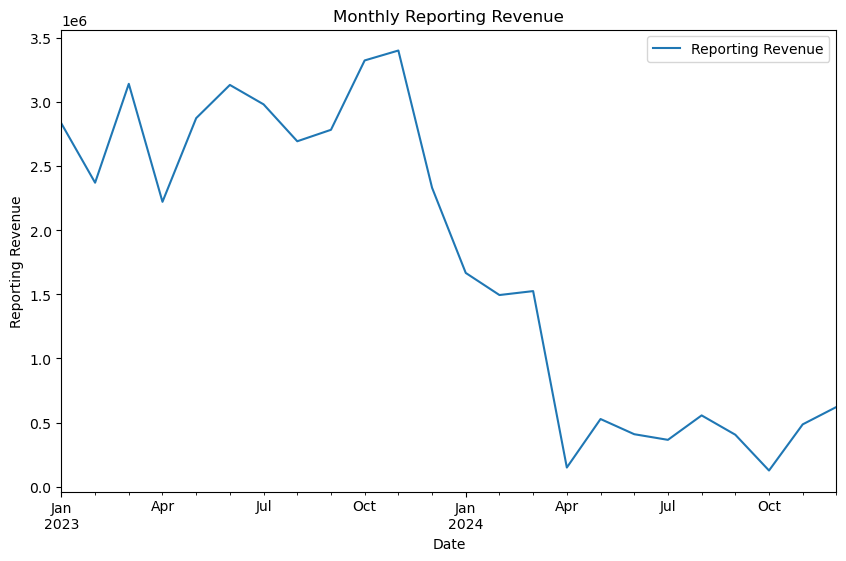

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Make sure 'Invoiced Date' is the index
data_cleaned['Invoiced Date'] = pd.to_datetime(data_cleaned['Invoiced Date'])
revenue_data = data_cleaned[['Invoiced Date', 'Reporting Revenue']]
revenue_data.set_index('Invoiced Date', inplace=True)

# Resample to monthly data, summing the Reporting Revenue for each month
monthly_revenue = revenue_data.resample('M').sum()

# Plot the monthly revenue data to visualize the trend and seasonality
monthly_revenue.plot(figsize=(10, 6))
plt.title('Monthly Reporting Revenue')
plt.ylabel('Reporting Revenue')
plt.xlabel('Date')
plt.show()

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'data_cleaned' contains the revenue data and 'Invoiced Date' is the date column.

# Ensure 'Invoiced Date' is in datetime format
data_cleaned['Invoiced Date'] = pd.to_datetime(data_cleaned['Invoiced Date'], errors='coerce')

# Set 'Invoiced Date' as the index
data_cleaned.set_index('Invoiced Date', inplace=True)

# Resample the data by month, summing the revenue for each month (if applicable)
monthly_revenue = data_cleaned.resample('ME').sum()  # Use 'ME' for monthly frequency

# Apply the Holt-Winters Exponential Smoothing model (with seasonality)
holt_winters_model = ExponentialSmoothing(
    monthly_revenue['Reporting Revenue'],
    trend='add',  # Additive trend component
    seasonal='add',  # Additive seasonal component
    seasonal_periods=6,  # Reduce seasonal period if there’s not strong yearly seasonality
    initialization_method="estimated"
).fit(maxiter=100)  # Allow up to 100 iterations for convergence

# Forecast the next 3 months (April, May, June 2024)
forecast = holt_winters_model.forecast(steps=3)

# Generate forecasted index for the next 3 months (April, May, June 2024)
forecast_index = pd.date_range(start='2024-04-01', periods=3, freq='ME')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Revenue'])

# Plotting actual and forecasted data together
plt.figure(figsize=(10, 6))

# Plot actual revenue data until March 2024
plt.plot(monthly_revenue.index, monthly_revenue['Reporting Revenue'], label='Actual Revenue', color='blue')

# Plot forecasted revenue from April 2024 onwards
plt.plot(forecast_df.index, forecast_df['Forecasted Revenue'], label='Forecasted Revenue', color='red', linestyle='--')

# Set titles and labels
plt.title('Holt-Winters Forecast for Reporting Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Print the forecasted revenue for April, May, and June 2024
print(forecast_df)

KeyError: 'Invoiced Date'

In [158]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114997 entries, 2023-08-06 to 2024-12-03
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Index               114997 non-null  int64  
 1   Order No            114997 non-null  object 
 2   Customer ID         114997 non-null  object 
 3   Site                114997 non-null  object 
 4   Channel (Web)       114997 non-null  object 
 5   Base Currency Code  114997 non-null  object 
 6   Base Revenue        114997 non-null  float64
 7   FX Rate             114997 non-null  float64
 8   Reporting Revenue   114997 non-null  float64
 9   Delivery Country    114997 non-null  object 
 10  Product Range       114997 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.5+ MB


In [160]:
data_cleaned.reset_index(inplace=True)

In [162]:
print(data_cleaned.columns)

Index(['Invoiced Date', 'Index', 'Order No', 'Customer ID', 'Site',
       'Channel (Web)', 'Base Currency Code', 'Base Revenue', 'FX Rate',
       'Reporting Revenue', 'Delivery Country', 'Product Range'],
      dtype='object')


In [164]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114997 entries, 0 to 114996
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Invoiced Date       114997 non-null  datetime64[ns]
 1   Index               114997 non-null  int64         
 2   Order No            114997 non-null  object        
 3   Customer ID         114997 non-null  object        
 4   Site                114997 non-null  object        
 5   Channel (Web)       114997 non-null  object        
 6   Base Currency Code  114997 non-null  object        
 7   Base Revenue        114997 non-null  float64       
 8   FX Rate             114997 non-null  float64       
 9   Reporting Revenue   114997 non-null  float64       
 10  Delivery Country    114997 non-null  object        
 11  Product Range       114997 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 10.5+ MB


In [166]:
data_cleaned.to_csv('forecasting_task_LGC.csv', index=False)

In [168]:
april_data = data_cleaned[(data_cleaned['Invoiced Date'].dt.month == 4) & (data_cleaned['Invoiced Date'].dt.year == 2024)]
total_april_revenue = april_data['Reporting Revenue'].sum()
print(f"Total Revenue for April 2024: ${total_april_revenue:.2f}")

Total Revenue for April 2024: $149926.94
